### Getting started with annotations

In [0]:
import numpy as np
import pandas as pd
import sys
import json
import glob
import matplotlib.pyplot as plt

In [0]:
def load_datas(folder):
    annotations = []
    list_file = glob.glob("{}*.json".format(folder))
    for file in list_file:
        with open(file, encoding="utf-8") as f:
            json_obj = json.loads(" ".join(f))
            annotations.append(json_obj)
    return annotations

In [0]:
def dict_to_df(annotations):
    asset = []
    for annotation in annotations:
        asset.extend([annotation["asset"]] * len(annotation["regions"]))
    df_asset = pd.DataFrame(asset)
    df_asset = df_asset.add_prefix('asset_')
    df_asset = df_asset.drop(columns='asset_size')
    size = []
    for annotation in annotations:
        size.extend([annotation["asset"]["size"]] * len(annotation["regions"]))       
    df_asset_size = pd.DataFrame(size)
    df_asset_size = df_asset_size.add_prefix('asset_size_')
    df_regions = pd.DataFrame([region for i in range(len(annotations)) for region in annotations[i]["regions"]])
    df_regions = df_regions.add_prefix('regions_')
    df_regions = df_regions.drop(columns='regions_boundingBox')
    df_regions_boundingBox = pd.DataFrame([region["boundingBox"] for annotation in annotations for region in annotation["regions"]])
    df_regions_boundingBox = df_regions_boundingBox.add_prefix('regions_boundingBox_')
    df = pd.concat([df_asset, df_asset_size, df_regions_boundingBox, df_regions], axis=1)
    df.regions_tags = [elem for elt in df.regions_tags for elem in elt]
    df.regions_tags[(df.regions_tags != 'drinking_bottle')& (df.regions_tags != 'unknow')] = 'unknow'
    df['points_count'] = [(len(counter)) for counter in df.regions_points]
    return df

In [0]:
annotations = load_datas("output/")
len(annotations)

509

In [0]:
df = dict_to_df(annotations)
df.head()

C:\Users\annabelle\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,asset_format,asset_id,asset_name,asset_path,asset_state,asset_type,asset_size_height,asset_size_width,regions_boundingBox_height,regions_boundingBox_left,regions_boundingBox_top,regions_boundingBox_width,regions_id,regions_points,regions_tags,regions_type,points_count
0,jpg,054c701d53ae957c713b0035cf72cbc2,20190628_183115.jpg,https://surftestvott.blob.core.windows.net/inp...,2,1,4608,3456,99.096774,1828.032787,3319.741935,141.639344,tSG7ziOnm,"[{'x': 1863.4426229508197, 'y': 3319.741935483...",unknow,POLYGON,4
1,jpg,054c701d53ae957c713b0035cf72cbc2,20190628_183115.jpg,https://surftestvott.blob.core.windows.net/inp...,2,1,4608,3456,162.801843,1410.196721,3935.557604,120.393443,-mcZK2BYV,"[{'x': 1530.5901639344263, 'y': 3935.557603686...",unknow,POLYGON,4
2,jpg,054c701d53ae957c713b0035cf72cbc2,20190628_183115.jpg,https://surftestvott.blob.core.windows.net/inp...,2,1,4608,3456,205.271889,1813.868852,4254.082949,233.704918,rkGnrdLSC,"[{'x': 2019.2459016393443, 'y': 4254.082949308...",unknow,POLYGON,6
3,PNG,059250a637564bda617bc910dc58662f,GOPRO27.PNG,https://surftestvott.blob.core.windows.net/inp...,2,1,601,535,145.208054,195.867717,75.293065,92.079146,EHZ7iwHPp,"[{'x': 219.39158684045228, 'y': 90.08277404921...",unknow,POLYGON,21
4,jpg,059c8e7c4c954fdb6cb795182e06bdc5,IMG_20190623_142911.jpg,https://surftestvott.blob.core.windows.net/inp...,2,1,4000,3000,161.290323,83.333333,2236.559140,295.698925,fAcwMAL3t,"[{'x': 83.33333333333333, 'y': 2279.5698924731...",unknow,POLYGON,6


In [0]:
len(df)

891

In [0]:
df.regions_tags.unique()

array(['unknow', 'drinking_bottle'], dtype=object)

In [0]:
# nombre de bounding box max par image
df["asset_name"].value_counts()[:20].sort_values(ascending = False)

Berge%204.JPG          26
05_Berge-copie3.jpg     8
20190628_183344.jpg     6
IMG_4335.JPG            6
IMG_4336.JPG            5
IMG_4362.JPG            5
20190628_183359.jpg     5
20190628_183345.jpg     5
IMG_4282.JPG            5
IMG_4369.JPG            5
IMG_4283.JPG            5
IMG_4264.JPG            5
IMG_4269.JPG            5
IMG_4334.JPG            5
IMG_4284.JPG            5
IMG_4368.JPG            5
IMG_4365.JPG            5
IMG_4367.JPG            5
IMG_4314.JPG            5
20190628_183459.jpg     4
Name: asset_name, dtype: int64

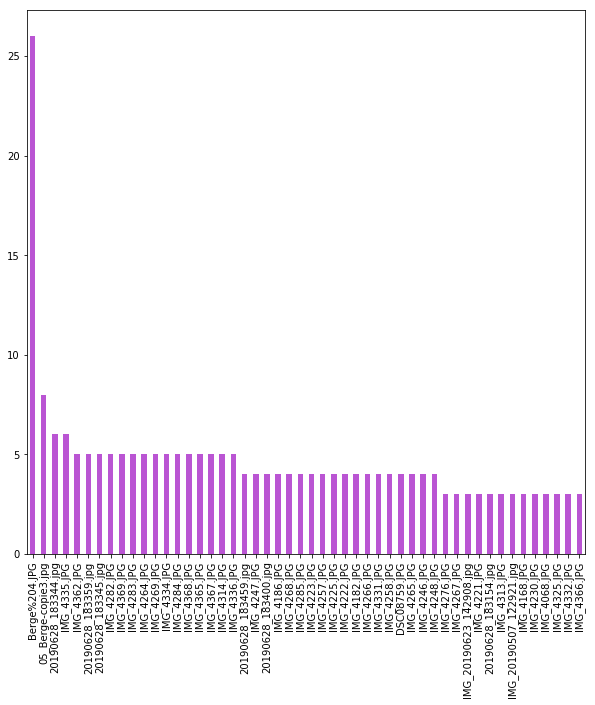

In [0]:
# plot nombres de bounding box par images
df["asset_name"].value_counts()[:50].plot(figsize=(10,10), color = 'mediumorchid', kind='bar')

In [0]:
# aplatir nombre d'images pour ne pas avoir la même image qui compterat plusieurs fois
img_size = df.groupby(["asset_name", "asset_size_height", "asset_size_width"], as_index = False).count()
img_size.head()

,asset_name,asset_size_height,asset_size_width,asset_format,asset_id,asset_path,asset_state,asset_type,regions_boundingBox_height,regions_boundingBox_left,regions_boundingBox_top,regions_boundingBox_width,regions_id,regions_points,regions_tags,regions_type,points_count
0,05_Berge-copie3.jpg,2960,4440,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1,1.PNG,588,456,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,20190618_115928.jpg,3024,3024,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,20190618_120609.jpg,3024,3024,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,20190618_121035.jpg,3024,3024,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
type(img_size)

pandas.core.frame.DataFrame

In [0]:
# s'assurer que les nombre d'images a bien été aplati
len(img_size["asset_name"])

509

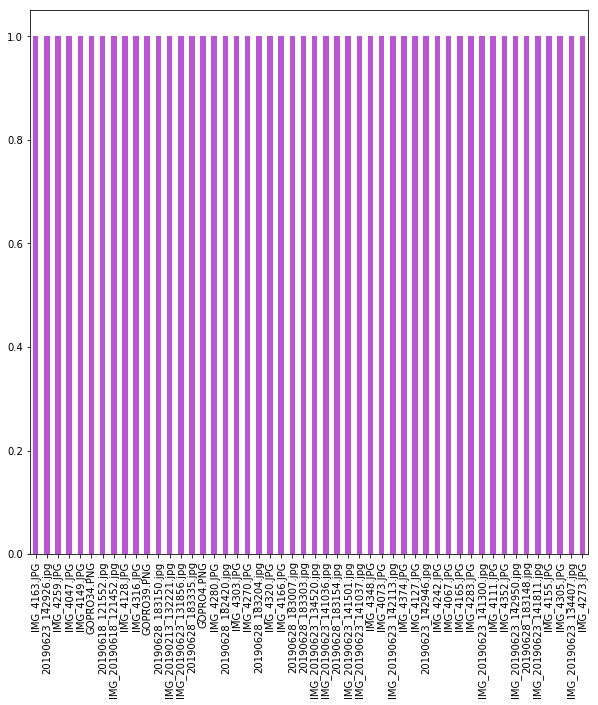

In [0]:
# plot nombres de bounding box par images (avec aplatissement une par/image )
img_size["asset_name"].value_counts()[:50].plot(figsize=(10,10), color = 'mediumorchid', kind='bar')

In [0]:
len(img_size["asset_size_height"])

509

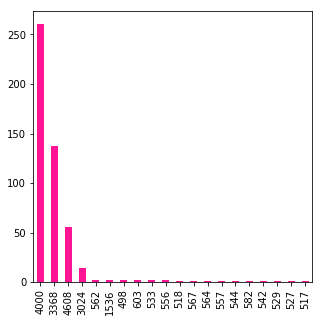

In [0]:
# comptabiliser les height les plus récurrentes
height_max = img_size["asset_size_height"].value_counts()[:20].sort_values(ascending = False).plot(figsize=(5,5), color = 'deeppink', kind='bar')

In [0]:
len(df["asset_size_width"])

891

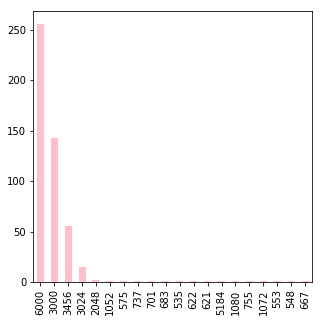

In [0]:
# comptabiliser les width les plus récurrentes
width_max = img_size["asset_size_width"].value_counts()[:20].sort_values(ascending = False).plot(figsize=(5,5), color = 'pink', kind='bar')

In [0]:
# petit dataframe uniquement avec les sizes
img_max = img_size[["asset_size_height", "asset_size_width"]]
img_max.head()

,asset_size_height,asset_size_width
0,2960,4440
1,588,456
2,3024,3024
3,3024,3024
4,3024,3024


In [0]:
img_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 508
Data columns (total 2 columns):
asset_size_height    509 non-null int64
asset_size_width     509 non-null int64
dtypes: int64(2)
memory usage: 11.9 KB


In [0]:
# height max
max(img_max["asset_size_height"])

4608

In [0]:
# width max
max(img_max["asset_size_width"])

6000

In [0]:
# voir s'il existe une image avec ces deux max (résultat non)
img = img_max[(img_max["asset_size_height"]== 4608) & (img_max["asset_size_width"]== 6000)]
img

,asset_size_height,asset_size_width


In [0]:
# comptabilisation des tailles les plus récurrentes
tot_img_size = img_max.groupby(['asset_size_width','asset_size_height']).size().reset_index(name="count")
tot_img_size.sort_values("count", ascending=False) 

,asset_size_width,asset_size_height,count
36,3000,4000,143
41,6000,3368,138
42,6000,4000,118
38,3456,4608,56
37,3024,3024,15
35,2048,1536,2
30,974,527,1
24,891,556,1
25,900,571,1
26,911,562,1


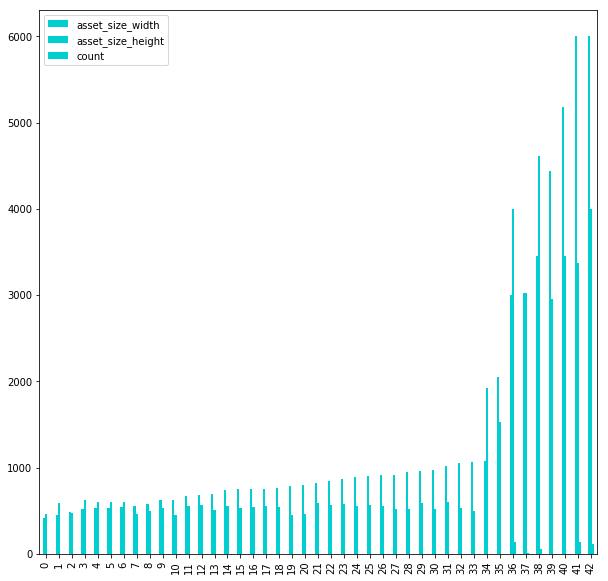

In [0]:
tot_img_size.plot(figsize=(10,10), color = 'darkturquoise', kind='bar')

In [0]:
# masque pour valeurs supérieures à 15
cat_15_or_more = tot_img_size[(tot_img_size["count"]>= 15)]
cat_15_or_more

,asset_size_width,asset_size_height,count
36,3000,4000,143
37,3024,3024,15
38,3456,4608,56
41,6000,3368,138
42,6000,4000,118


In [0]:
# une seule categorie pour les chiffres inferieurs ou = à 2
cat_2_or_less = tot_img_size[(tot_img_size["count"]<= 2)]
cat_2_or_less.head()

,asset_size_width,asset_size_height,count
0,414,462,1
1,456,588,1
2,488,477,1
3,517,622,1
4,528,603,1


In [0]:
# faire une ligne (somme) avec toutes ces valeurs
cat_2_or_less = cat_2_or_less.sum()
cat_2_or_less

asset_size_width     38202
asset_size_height    28273
count                   39
dtype: int64

In [0]:
# rajouter une ligne pour les chiffres <= 2 à cat_15_or_more


In [0]:
# nouveau dataframe avec les valeurs pour plot 
cat_pie_chart = cat_15_or_more 
cat_pie_chart

,asset_size_width,asset_size_height,count
36,3000,4000,143
37,3024,3024,15
38,3456,4608,56
41,6000,3368,138
42,6000,4000,118


In [0]:
# rajouter une colonne size avec str des deux dimensions pour legendes width * height
colonne_size = (str(cat_pie_chart["asset_size_width"]) + str(cat_pie_chart["asset_size_height"]))
colonne_size

'36    3000\n37    3024\n38    3456\n41    6000\n42    6000\nName: asset_size_width, dtype: int6436    4000\n37    3024\n38    4608\n41    3368\n42    4000\nName: asset_size_height, dtype: int64'

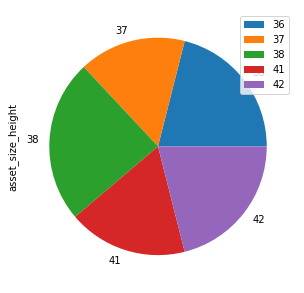

In [0]:
cat_pie_chart.plot.pie("asset_size_height",figsize=(5, 5))
plt.show()

In [0]:
# comptabiliser le nombre de bouteilles & unknown
nb_bouteilles = df.regions_tags[(df.regions_tags == 'drinking_bottle')]
nb_bouteilles
len(nb_bouteilles)

128

In [0]:
# comptabiliser le nombre de bouteilles & unknown
nb_unknow = df.regions_tags[(df.regions_tags == 'unknow')]
nb_unknow 
len(nb_unknow)

763

In [0]:
import matplotlib.pyplot as plt
